# HW 3: Optimization

## Optimization via Gradient Descent
In this Homework, we will consider a general optimization problem:

$$
x^* = \arg\min_{x \in \mathbb{R}^n}f(x).
$$

where, $f: \mathbb{R}^n \to \mathbb{R}$ is a differentiable function for which we know how to compute $\nabla f(x)$.
This is done by the Gradient Descent (GD) method: an iterative algorithm that, given an initial iterate $x_0 \in \mathbb{R}^n$ and a positive parameter $\alpha_k > $ called *step size*, computes:

$$
x_{k+1} = x_k − \alpha_k \nabla f (x_k).
$$

You are asked to implement the GD method in Python and to test it with some exemplar functions. In particular:

*  Write a script that implement the GD algorithm with fixed step size (i.e. no backtracking), with the input-output structure discussed in the first Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Write a script that implement the GD algorithm with backtracking, with the input-output structure discussed in the second Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Test the algorithm above on the following functions:
    1. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2, 
       $$

       for which the true solution is $x^* = (3, 1)^T$.

    2. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2, 
       $$

       for which the true solution is $x^* = (1, 2)^T$.
    3. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2}|| Ax - b ||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ is the Vandermonde matrix associated with the vector $v \in \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0,1]$, and $b \in \mathbb{R}^n$ is computed by first setting $x^* = (1, 1, \dots ,1)^T$, and then $b = A x^*$. Try for different values of $n$ (e.g. $n = 5,10,15, \dots$).
    4. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ and $b \in \mathbb{R}^n$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$. Try different values of $\lambda$ and comment the result.
    5. $f: \mathbb{R} \to \mathbb{R}$ such that:

       $$
       f(x) = x^4 + x^3 - 2x^2 - 2x.
       $$

* For each of the functions above, test the GD method with and without backtracking, trying different values for the step size $\alpha > 0$ when backtracking is not employed. Comment on the results.
* Plot the value of $||\nabla f(x_k)||_2$ as a function of $k$, check that it goes to zero, and compare the convergence speed (in terms of the number of iterations $k$) for the different values of $\alpha > 0$ and with backtracking.
* For each of the points above, use:
  - `x0` = $(0, 0, \dots, 0)^T$ (except for function 5, which is discussed in the following point),
  - `kmax` = 100,
  - `tolf` = `tolx` = `1e-5`. 
  Also, when the true solution $x^*$ is given, plot the error $||x_k−x^*||_2$ as a function of $k$.
* Plot the graph of the non-convex function 5 in the interval $[−3,3]$, and test the convergence of GD with different values of `x0` (of your choice) and different step-sizes. When is the convergence point the global minimum?
* *Hard (optional):* For functions 1 and 2, show the contour plot around the true minimum and visualize the path described by the iterations, i.e. representing on the contour plot the position of each iterate computed by the GD algorithm. See the `plt.contour` documentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(f, grad_f, x0, alpha, kmax, tolx, tolf, backtracking_fn=None, **kwargs):
    """
    Perform gradient descent optimization with a fixed step size or backtracking.
    Parameters:
    f (function): The objective function to minimize.
    grad_f (function): The gradient of the objective function.
    x0 (numpy array): The initial guess for the variables.
    alpha (float): The fixed step size for the gradient descent.
    kmax (int): The maximum number of iterations.
    tolx (float): The tolerance for the change in x values.
    tolf (float): The tolerance for the gradient norm.
    backtracking_fn (function, optional): The backtracking function to determine step size.
    kwargs: Additional parameters for the objective function and its gradient.
    Returns:
    tuple: A tuple containing the final variables (xk) and a history dictionary.
        - xk (numpy array): The final variables after optimization.
        - history (dict): A dictionary containing the history of x, f, and grad_f values.
            - 'x' (list): The history of x values.
            - 'f' (list): The history of function values.
            - 'grad_f' (list): The history of gradient values.
    """
    xk = x0
    fk = f(xk, **kwargs)
    grad_fk = grad_f(xk, **kwargs)
    k = 0
    history = {'x': [xk], 'f': [fk], 'grad_f': [grad_fk], 'err': [np.linalg.norm(grad_fk)]}
    if backtracking_fn:
        alpha = backtracking_fn(f, xk, grad_fk, **kwargs)

    while k < kmax:
        if backtracking_fn:
            alpha = backtracking_fn(f, xk, grad_fk, alpha, **kwargs)

        xk_new = xk - alpha * grad_fk
        fk_new = f(xk_new, **kwargs)
        
        if np.linalg.norm(xk_new - xk) < tolx or np.linalg.norm(fk_new - fk) < tolf:
            return xk_new, history
        
        xk, fk, grad_fk = xk_new, fk_new, grad_f(xk_new, **kwargs)
        k += 1
        history['x'].append(xk)
        history['f'].append(fk)
        history['grad_f'].append(grad_fk)

    return xk, history

def backtracking(f, xk, grad_fk, alpha=1, rho=0.25, c=1e-4, **kwargs):
    """
    Perform backtracking line search to find the step size that satisfies the Armijo condition.

    Parameters:
    f (function): The objective function to minimize.
    xk (numpy.ndarray): The current point in the domain of f.
    grad_fk (numpy.ndarray): The gradient of f at the current point xk.
    alpha (float): The initial step size.
    rho (float, optional): The factor by which to decrease alpha at each iteration. Default is 0.5.
    c (float, optional): The constant used in the Armijo condition. Default is 1e-4.
    kwargs: Additional parameters for the objective function.

    Returns:
    float: The step size that satisfies the Armijo condition.
    """    
    while f(xk - alpha * grad_fk, **kwargs) > f(xk, **kwargs) - c * alpha * np.linalg.norm(grad_fk)**2:
        alpha *= rho
    return alpha

In [3]:
def plot_convergence_and_error(histories, labels):
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

	# Plot convergence
	for history, label in zip(histories, labels):
		ax1.plot(history['f'], label='{}'.format(label))
	ax1.set_xlabel('Iteration')
	ax1.set_ylabel('Function value')
	ax1.set_title('Convergence of gradient descent')
	ax1.legend()

	# Plot error
	for history, label in zip(histories, labels):
		errors = [np.linalg.norm(x) for x in history['grad_f']]
		ax2.plot(errors, label='{}'.format(label))
	ax2.set_xlabel('Iteration')
	ax2.set_ylabel('Error')
	ax2.set_title('Error of gradient descent')
	ax2.legend()
	plt.show()
	

In [4]:
def plot_1d_trajectory(histories, f, x0, names):
    x = np.linspace(-2, x0 + 2, 300)
    y = f(x)
    
    dimx = round(len(histories)/2)
    dimy = round(len(histories)/2)

    fig, ax = plt.subplots(dimx, dimy, figsize=(14, 14))
    for ax, history, name in zip(ax.flatten(), histories, names):
        ax.plot(x, y)
        ax.plot([x for x in history['x']], [f(x) for x in history['x']], marker='o')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title(f'Trajectory of gradient descent for {name}')
    plt.tight_layout()
    plt.show()

def plot_2d_trajectory(histories, f, x0, names):
    x = np.linspace(-1, x0[0] + 1, 100)
    y = np.linspace(-1, x0[1] + 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    
    dimx = round(len(histories)/2)
    dimy = round(len(histories)/2)
    fig, axes = plt.subplots(dimx, dimy, figsize=(14, 14))
    for ax, history, name in zip(axes.flatten(), histories, names):
        ax.contour(X, Y, Z, 50)
        ax.plot([x[0] for x in history['x']], [x[1] for x in history['x']], marker='o')
        ax.scatter(history['x'][-1][0], history['x'][-1][1], color='green')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'Trajectory of gradient descent for {name}')
    plt.tight_layout()
    plt.show()

In [5]:
def plot_perspectives(history, f, n):
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))
    for i in range(n):
        axes[i].plot([x[i] for x in history['x']], [f(x) for x in history['x']], 'ro-')
        axes[i].set_xlabel(f'x{i+1}')
        axes[i].set_ylabel('f(x)')
        axes[i].set_title(f'Plot (x{i+1}, f(x))')
    plt.show()

In [6]:
def test_function(
    f,
    grad_f,
    x0,
    kmax=100,
    tolf=1e-5,
    tolx=1e-5,
    lrs=[1e-1, 1e-2, 1e-3],
    plot_trajectory=False,
    plot_best_perspectives=False,
    **kwargs,
):
    # Run gradient descent for different learning rates
    x_opts, histories, names = [], [], []
    for alpha in lrs:
        x_opt, history = gradient_descent(
            f, grad_f, x0, alpha, kmax, tolx, tolf, **kwargs
        )
        names.append(f"lr={alpha}")
        x_opts.append(x_opt)
        histories.append(history)

    # Gradient with backtracking
    x, h = gradient_descent(
        f, grad_f, x0, alpha, kmax, tolx, tolf, backtracking_fn=backtracking, **kwargs
    )
    names.append("backtracking")
    x_opts.append(x)
    histories.append(h)

    best = np.argmin([history['f'][-1] for history in histories])
    print(f'Best approach: {names[best]}')
    print(f'best_x: {x_opts[best]}')
    print(f'best_f: {histories[best]["f"][-1]}')
    print(f'best_k: {len(histories[best]["f"])}')
    plot_convergence_and_error(histories, names)
    if plot_trajectory:
        if type(x0) == float or type(x0) == int:
            plot_1d_trajectory(histories, f, x0, names)
        elif (type(x0) == np.ndarray or type(x0) == list) and len(x0) == 2:
            plot_2d_trajectory(histories, f, x0, names)
    if plot_best_perspectives:
        plot_perspectives(histories[best], f, len(x0))

Best approach: backtracking
best_x: [3.00068383 1.00130243]
best_f: 8.655752535305725e-06
best_k: 12


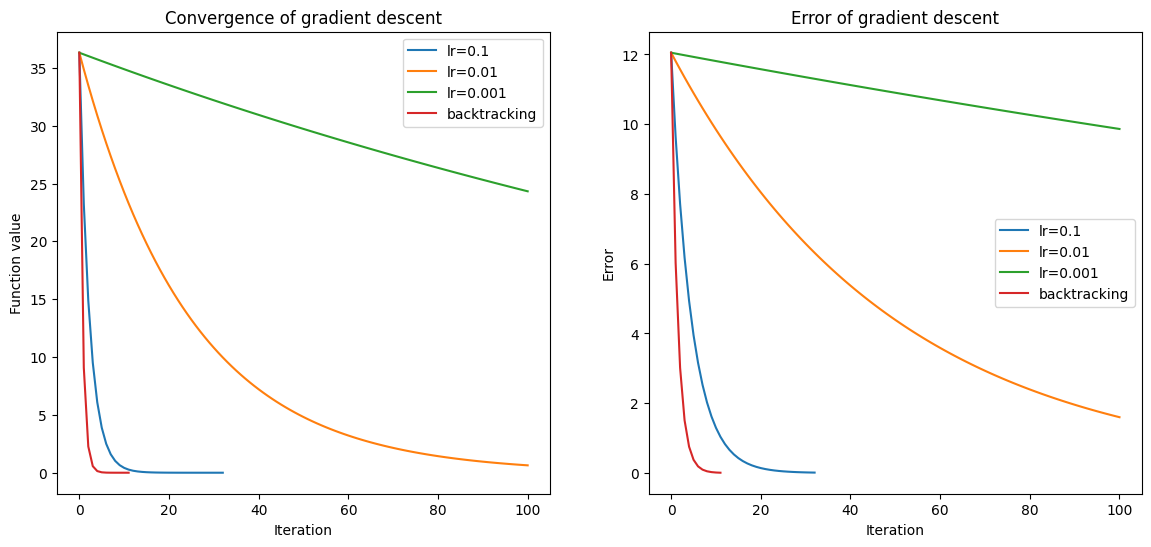

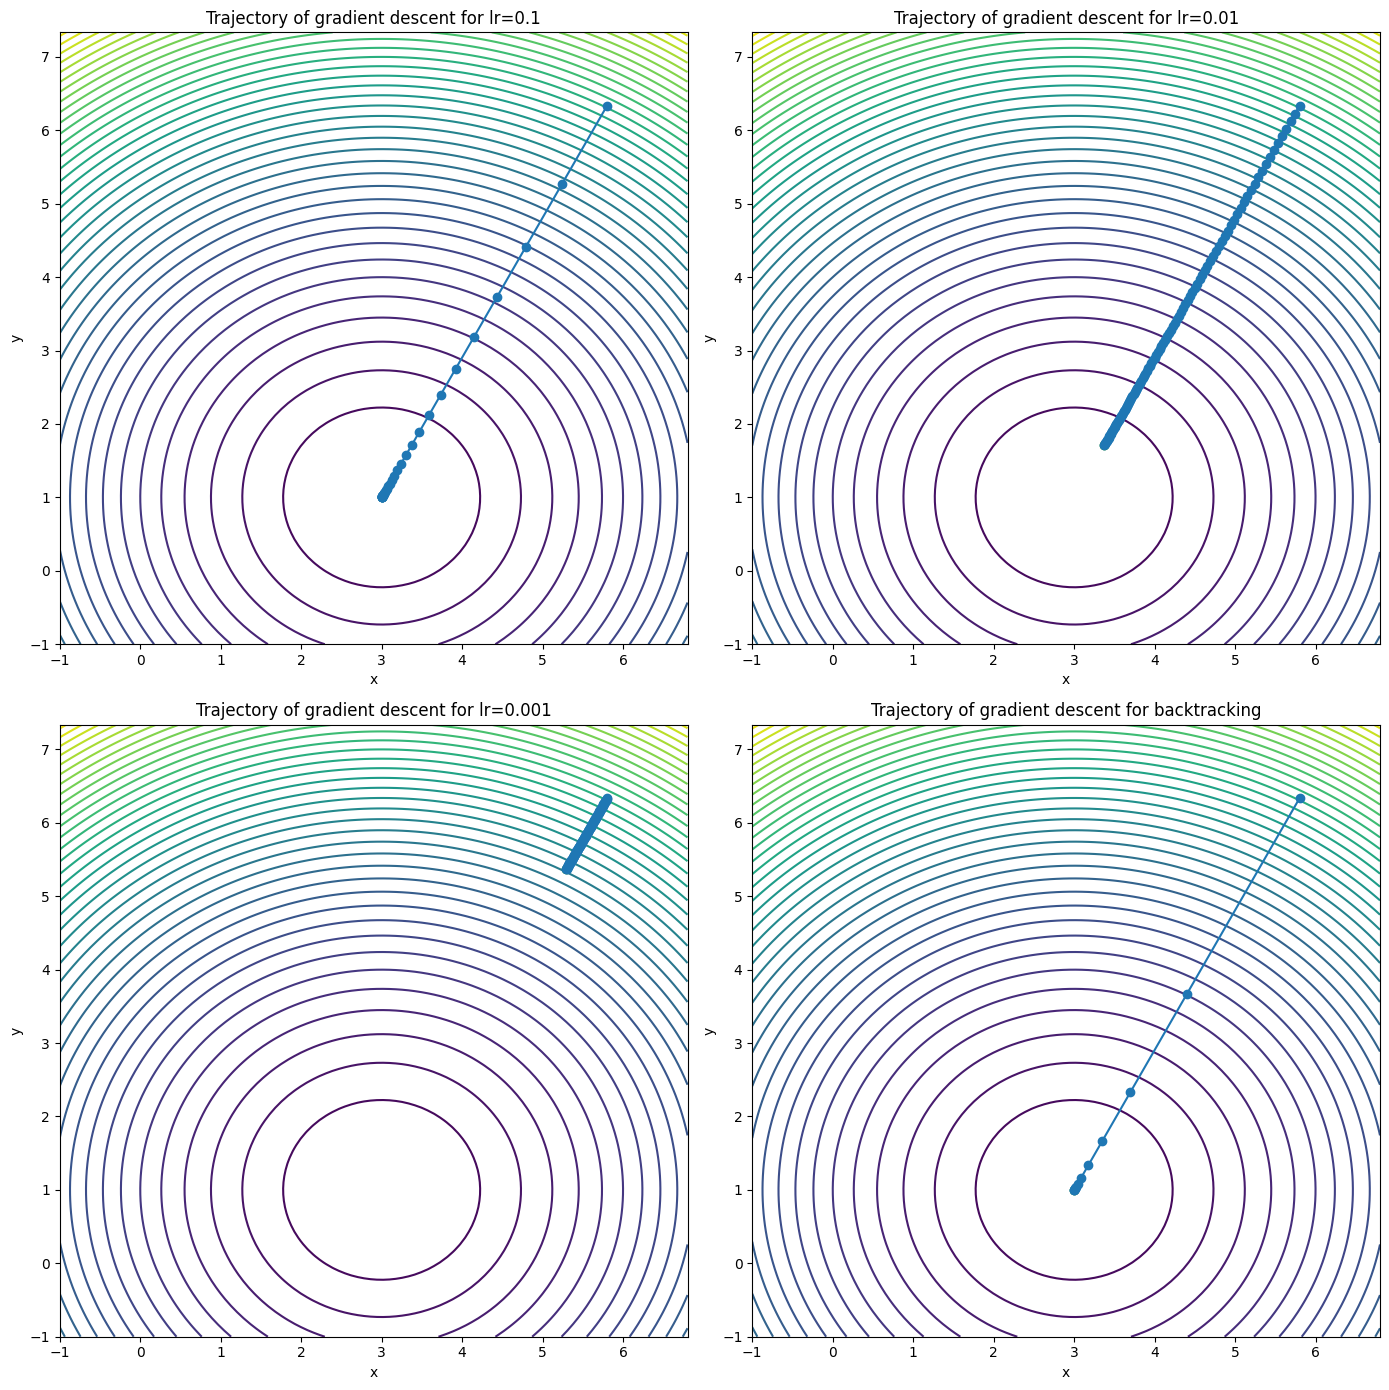

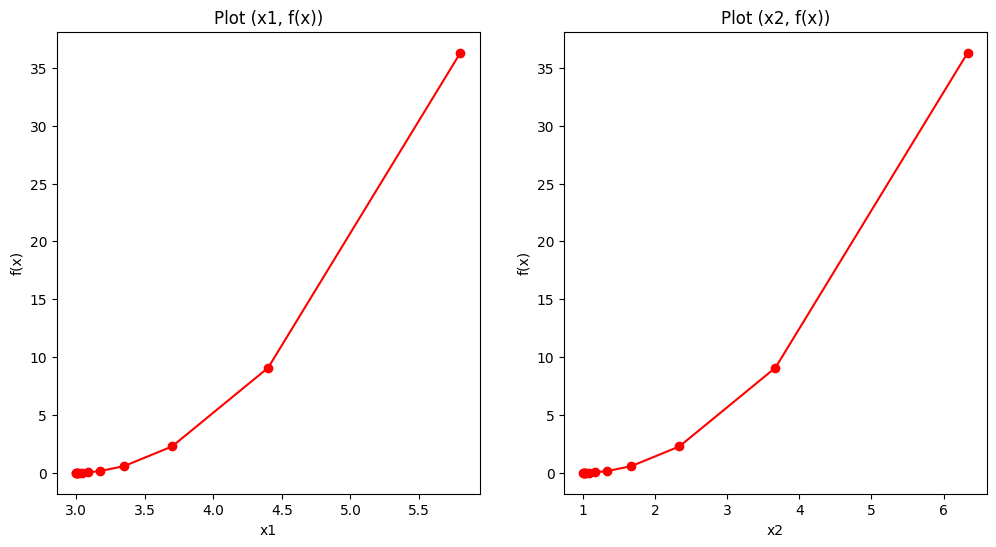

In [7]:
def f1_example(x):
    return (x[0]-3)**2 + (x[1]-1)**2

def grad_f1_example(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])

x0 = np.random.rand(2) * 10
test_function(f1_example, grad_f1_example, x0, plot_trajectory=True, plot_best_perspectives=True)

Best approach: backtracking
best_x: [1.         2.00529789]
best_f: 3.665977389906293e-05
best_k: 46


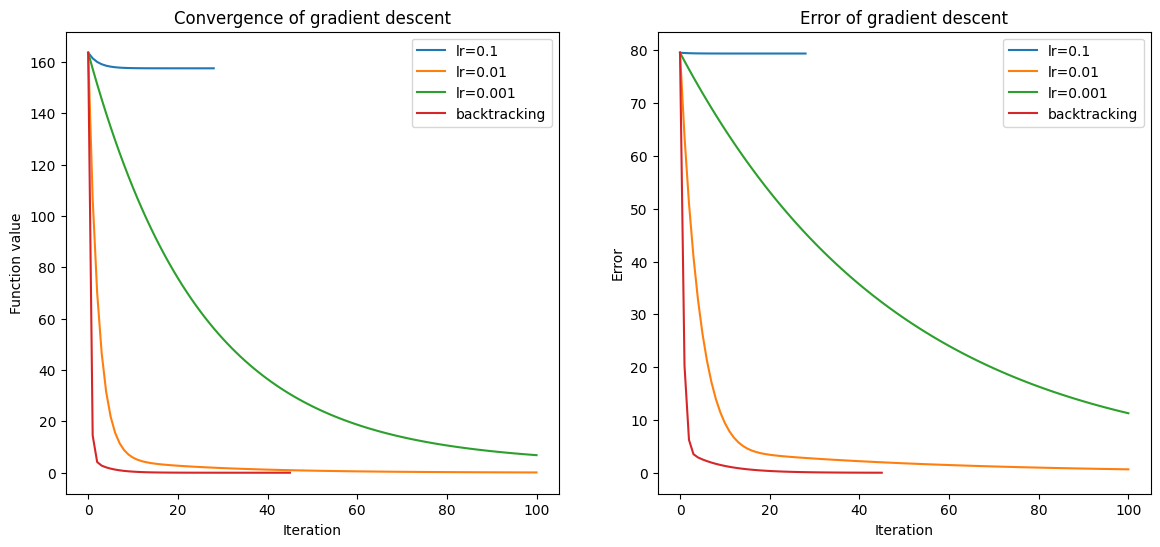

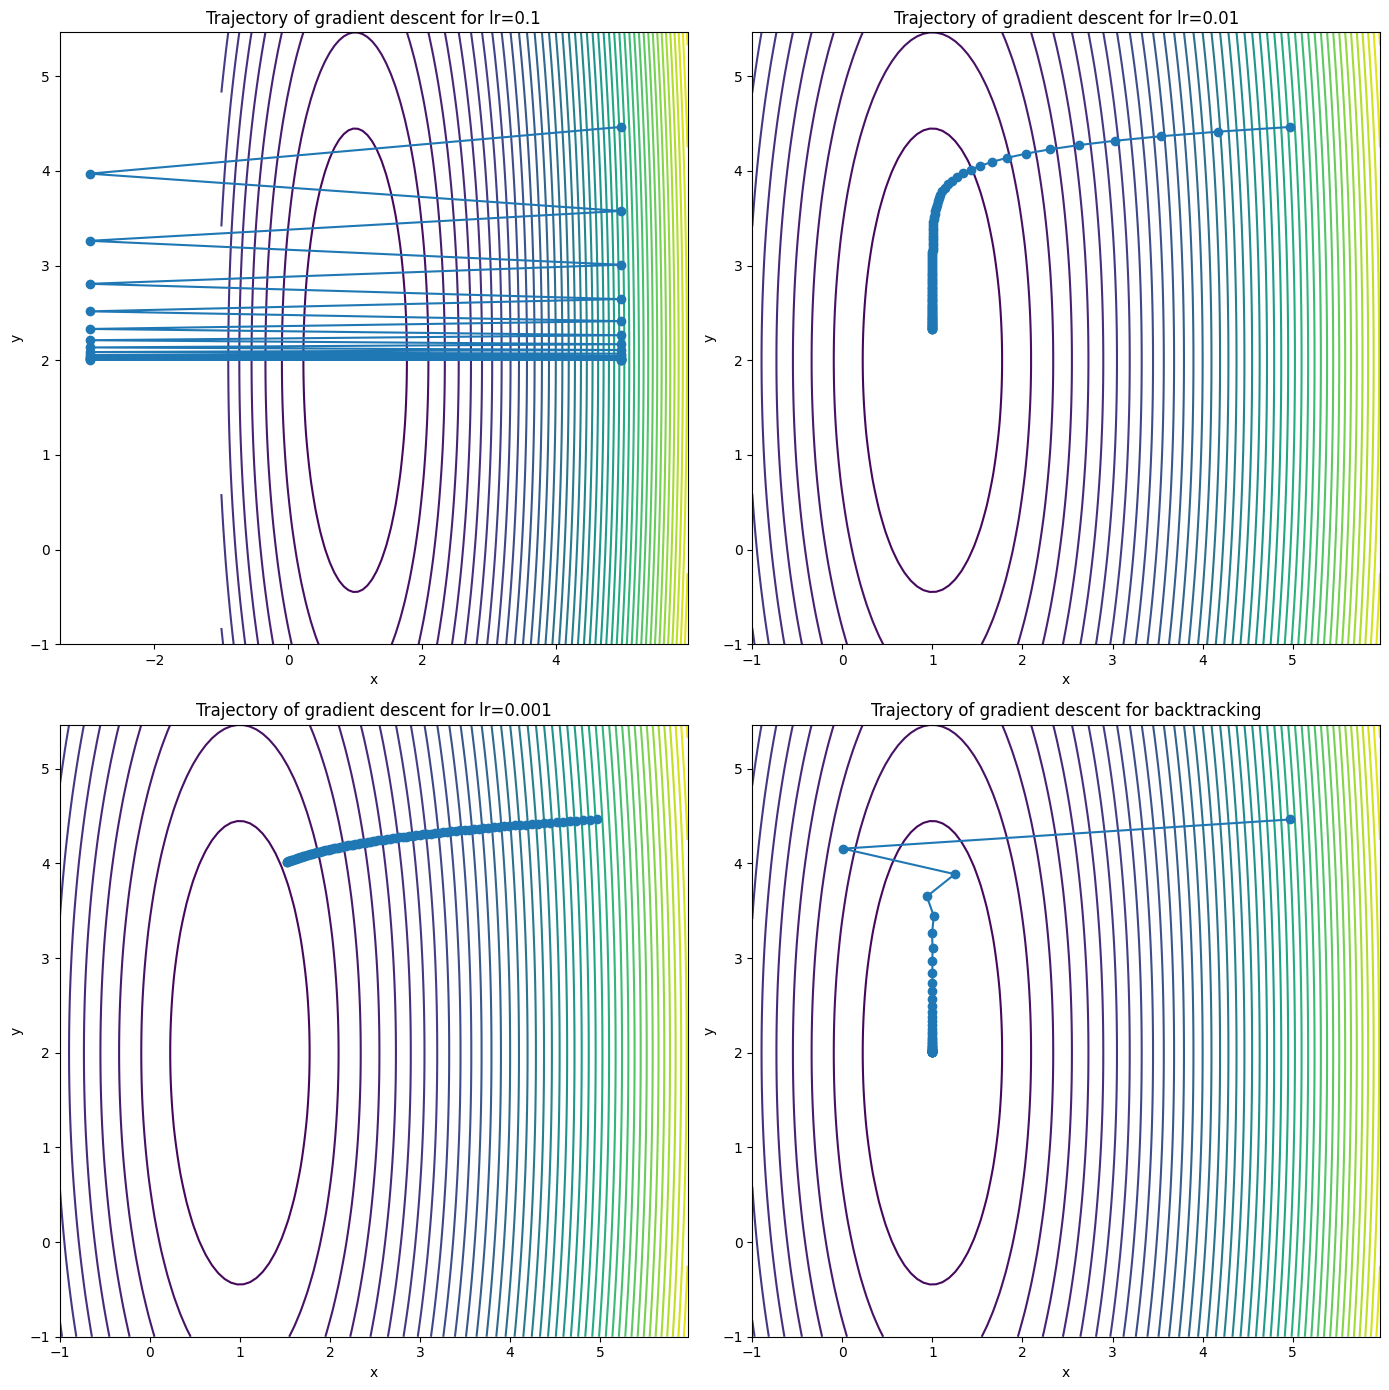

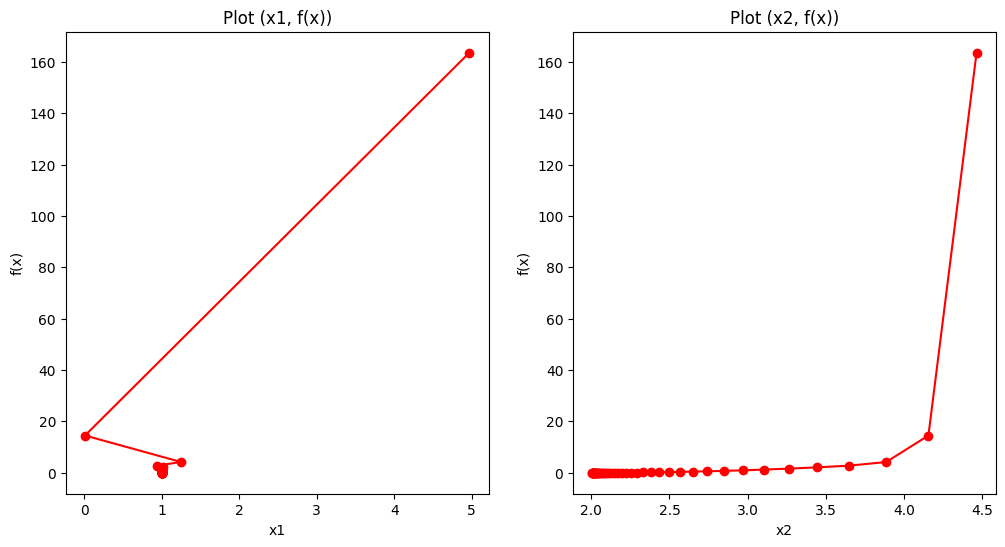

In [8]:
def f2_example(x):
    return  10*(x[0] - 1)**2 + (x[1] - 2)**2

def grad_f2_example(x):
    return np.array([20*(x[0] - 1), 2*(x[1] - 2)])

x0 = np.random.rand(2) * 10
test_function(f2_example, grad_f2_example, x0, plot_trajectory=True, plot_best_perspectives=True)

f3_example with n=5
Best approach: backtracking
best_x: [ 4.83736873 -2.2554649  -1.0873191   2.66509389  0.90663929]
best_f: 0.03590078405573943
best_k: 101


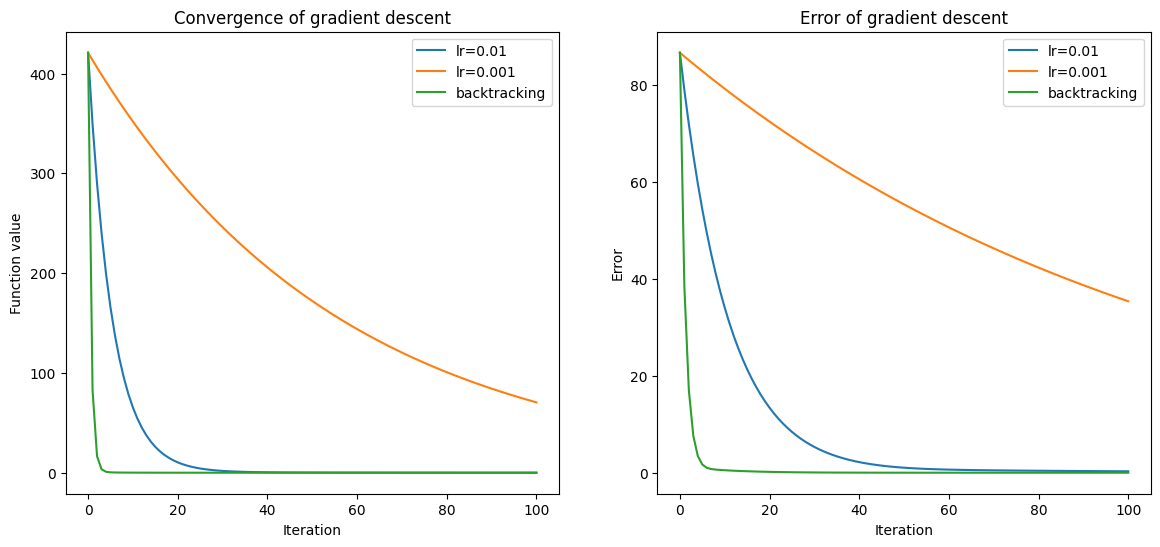

f3_example with n=10
Best approach: backtracking
best_x: [ 4.60017223 -2.09283234  2.72272219 -0.35225265 -3.21964026  1.63497785
  5.07563508  0.13264602  0.43636288  1.08128633]
best_f: 0.010664188083990316
best_k: 101


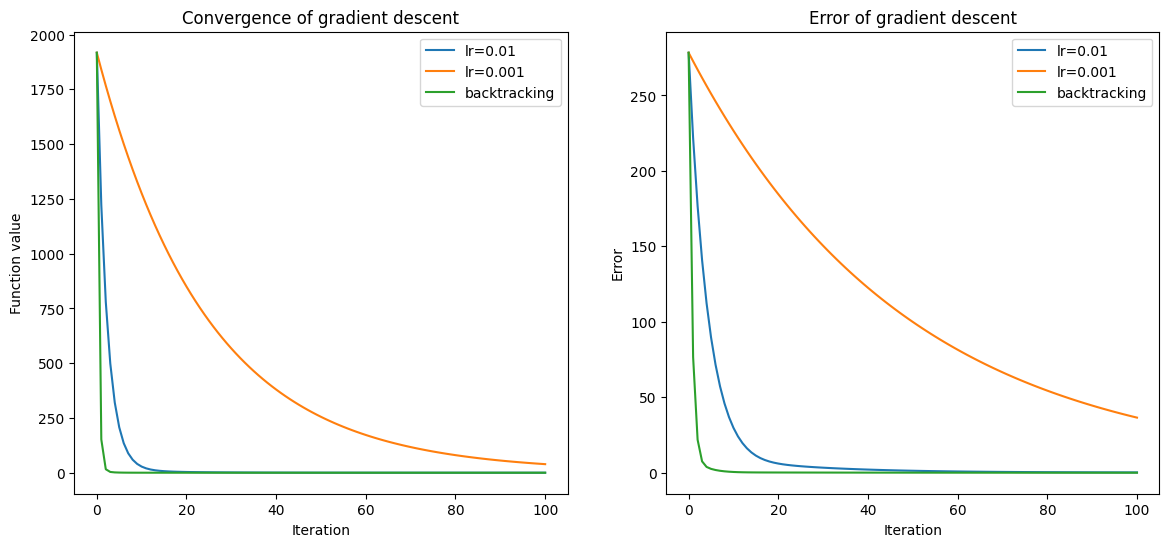

f3_example with n=20
Best approach: backtracking
best_x: [ 0.16758215 -2.19447175  4.49099946 -2.68860849 -2.31408365  1.07743201
  2.00657906  4.17328692 -4.15375897  4.68759889  4.10857957  2.74706667
  3.81671022  0.18038609  3.82898351 -0.40919451 -1.04434412 -3.46043316
  3.78949754  0.91849998]
best_f: 0.8827179260242518
best_k: 101


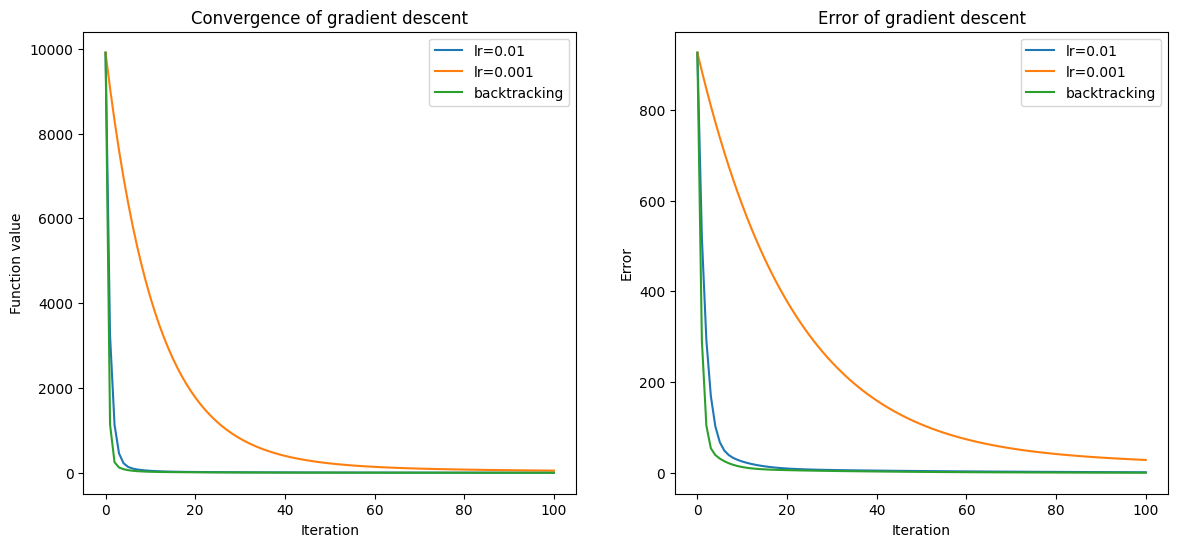

In [9]:
def f3_example(x):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n)
    b = A @ x_true
    return 0.5 * np.linalg.norm(A @ x - b, 2)**2

def grad_f3_example(x):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n)
    b = A @ x_true
    return A.T @ (A @ x - b)

# Test f3_example with different dimensions of Matrix A
for n in [5, 10, 20]:
	print(f'f3_example with n={n}')
	x0 = np.random.rand(n) * 10  # Adjust the dimension of x0 to match the function
	test_function(f3_example, grad_f3_example, x0, lrs=[1e-2, 1e-3])

f4_example with lambda=0.0
Best approach: backtracking
best_x: [ 1.88328973  0.07268756 -0.33544284  2.53220633  0.77674303]
best_f: 0.04251578751310945
best_k: 251


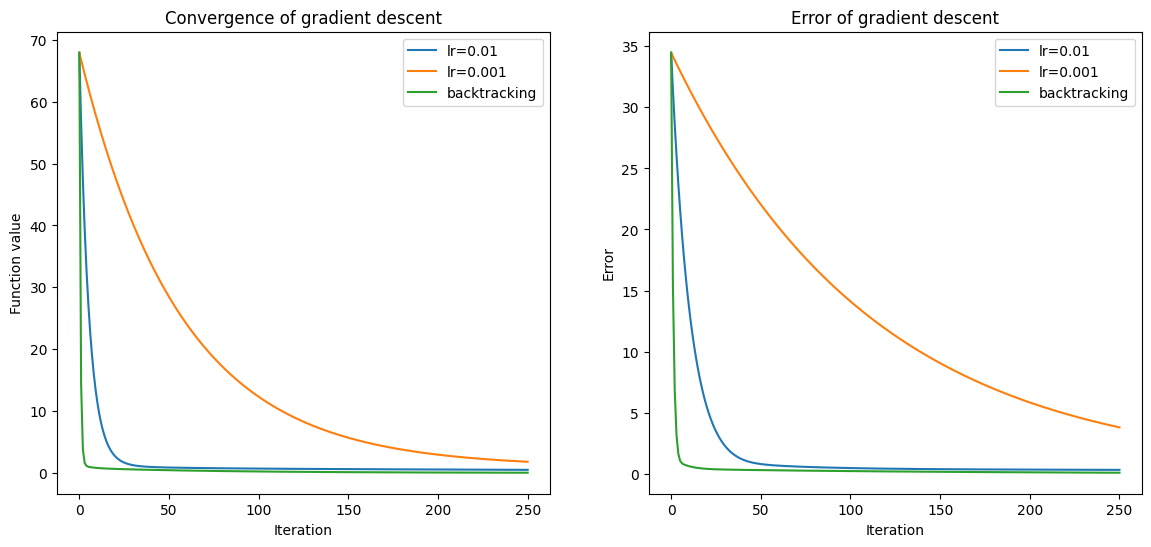

f4_example with lambda=0.25
Best approach: backtracking
best_x: [0.93684913 0.84738021 0.99206099 1.01093811 1.01205195]
best_f: 0.600935467284909
best_k: 251


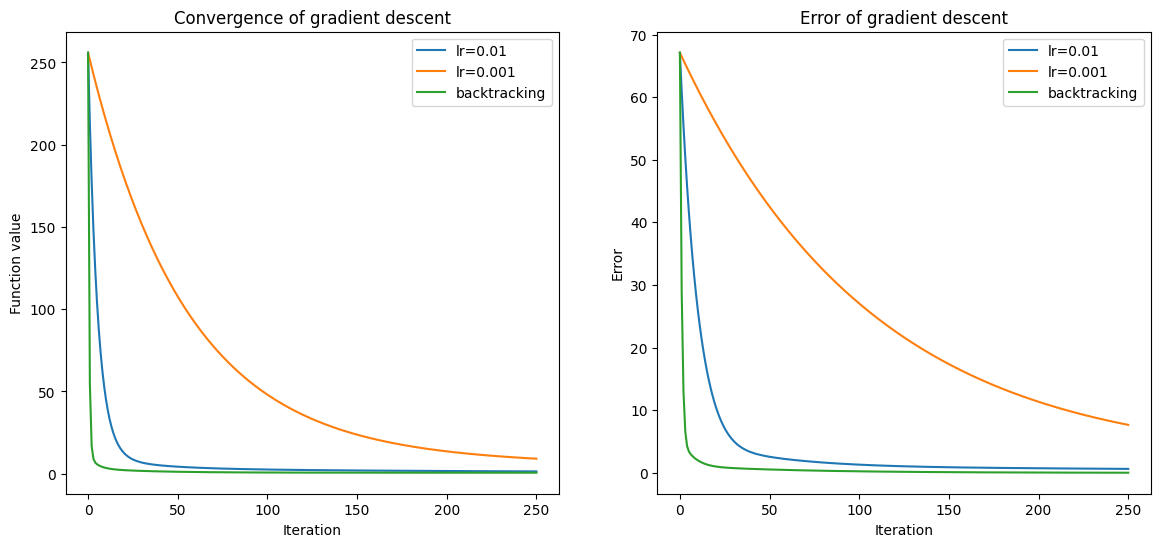

f4_example with lambda=0.5
Best approach: backtracking
best_x: [0.84615792 0.85078052 0.91848922 0.99151403 1.02162604]
best_f: 1.1574548138787093
best_k: 163


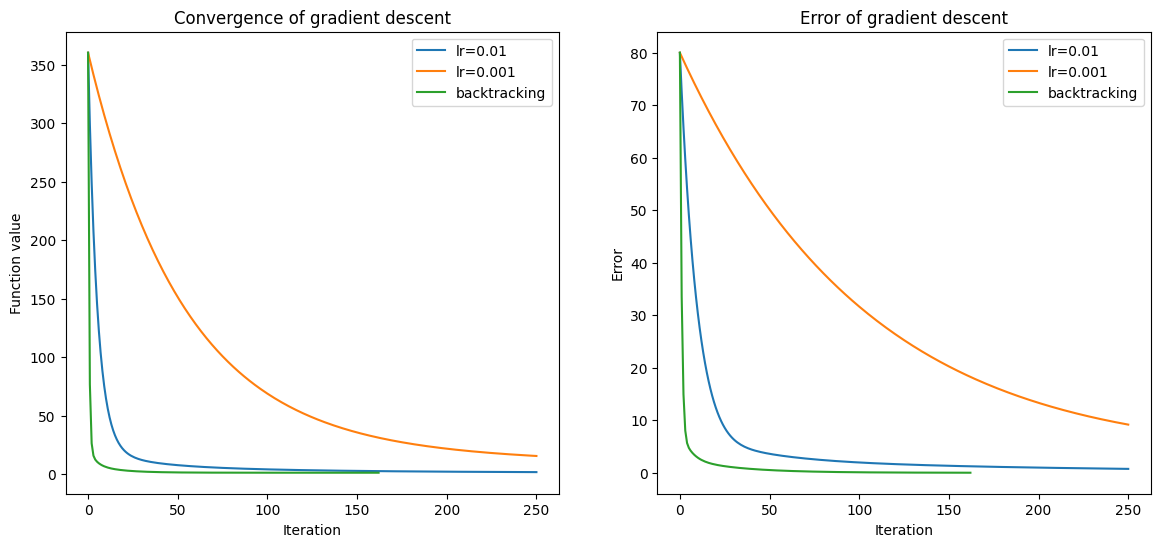

f4_example with lambda=0.75
Best approach: backtracking
best_x: [0.79536866 0.83792964 0.86697378 0.95050744 1.02791255]
best_f: 1.6792778396329742
best_k: 94


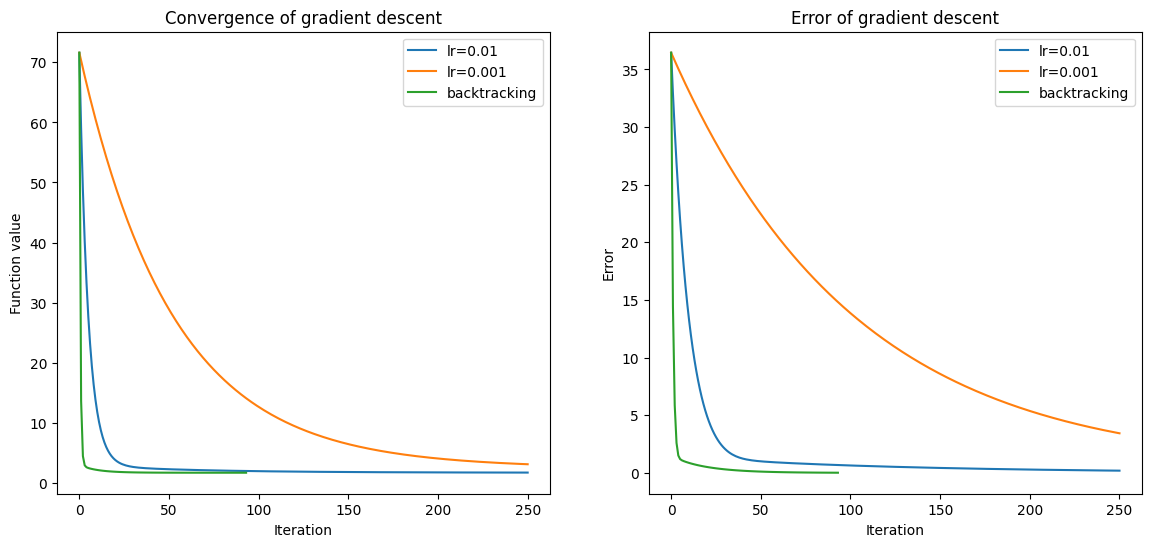

f4_example with lambda=1.0
Best approach: backtracking
best_x: [0.76124925 0.78468038 0.85075643 0.91896986 1.02496616]
best_f: 2.170207333281663
best_k: 97


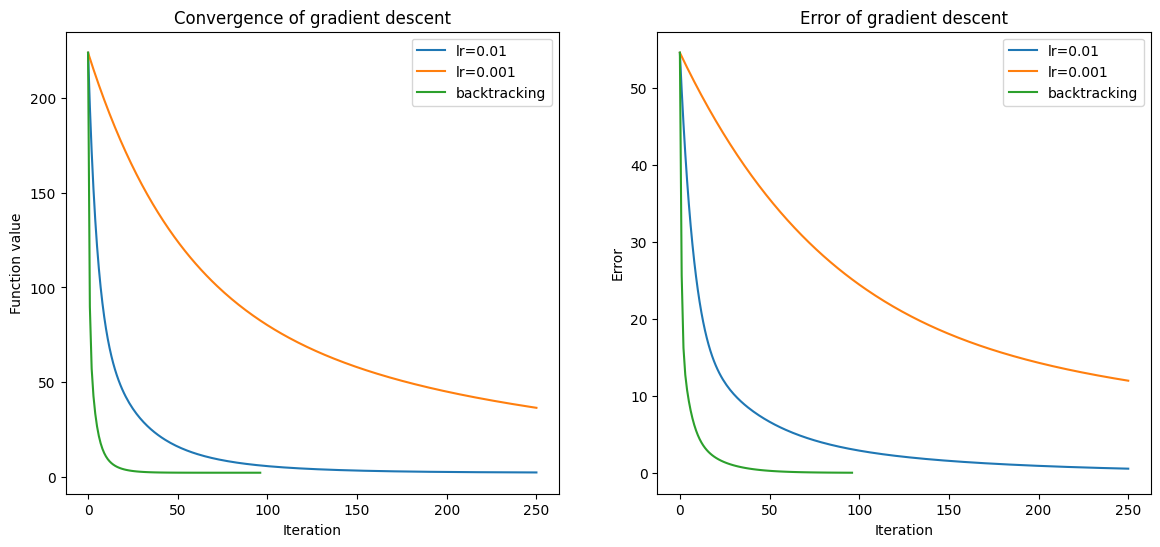

In [10]:
def f4_example(x, lambda_):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n)
    b = A @ x_true
    return 0.5 * np.linalg.norm(A @ x - b, 2)**2 + 0.5 * lambda_ * np.linalg.norm(x, 2)**2

def grad_f4_example(x, lambda_):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n)
    b = A @ x_true
    return A.T @ (A @ x - b) + lambda_ * x

# Test f4_example with a fixed dimension of Matrix A but different values of lambda
for lambda_ in np.linspace(0, 1, 5):
    print(f'f4_example with lambda={lambda_}')
    x0 = np.random.rand(5) * 10  # Adjust the dimension of x0 to match the function
    test_function(f4_example, grad_f4_example, x0, lrs=[1e-2, 1e-3], kmax=250, lambda_=lambda_)

> For increasing values of lambda the error converges to zero faster, but we only notice that for bigger values of kmax.

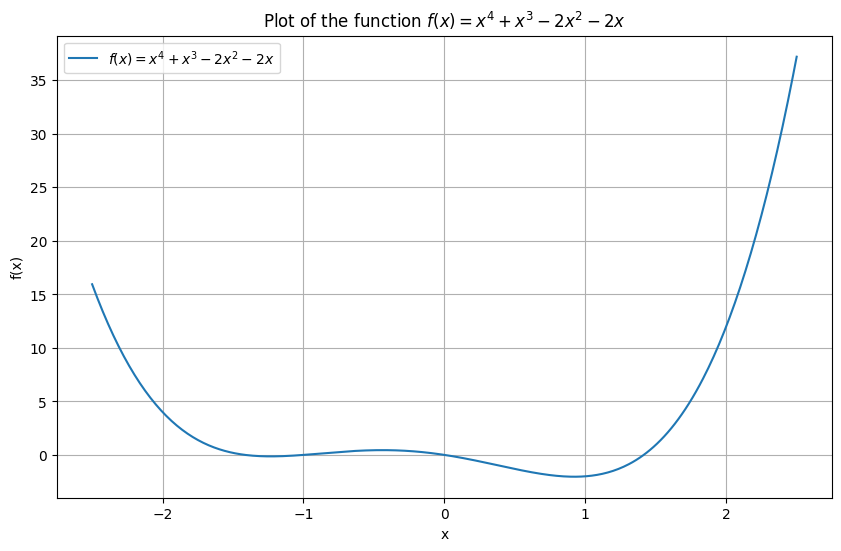

Best approach: lr=0.1
best_x: 0.922277786172406
best_f: -2.037747494062107
best_k: 7


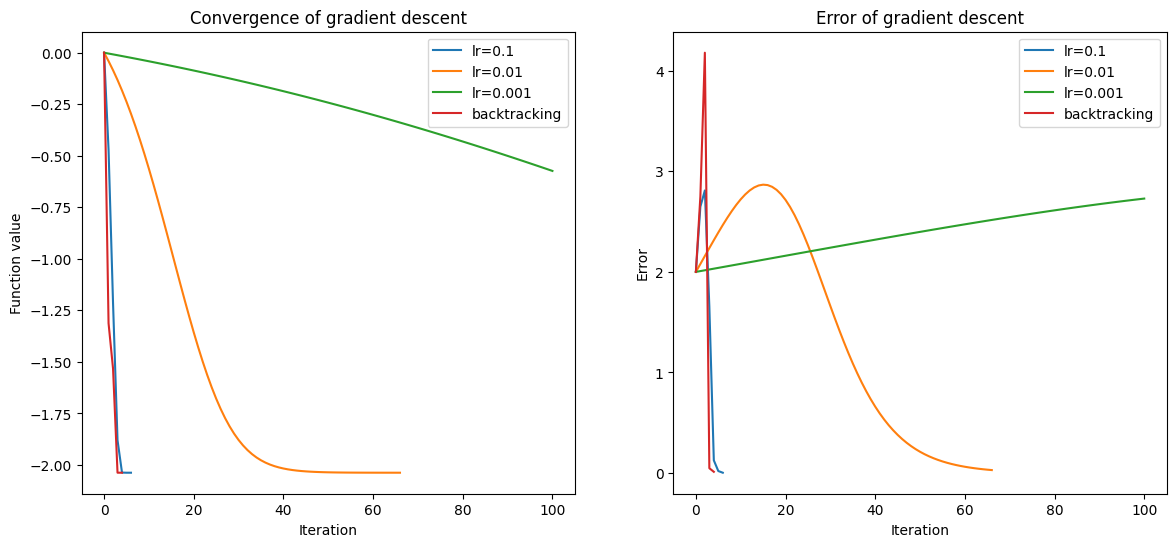

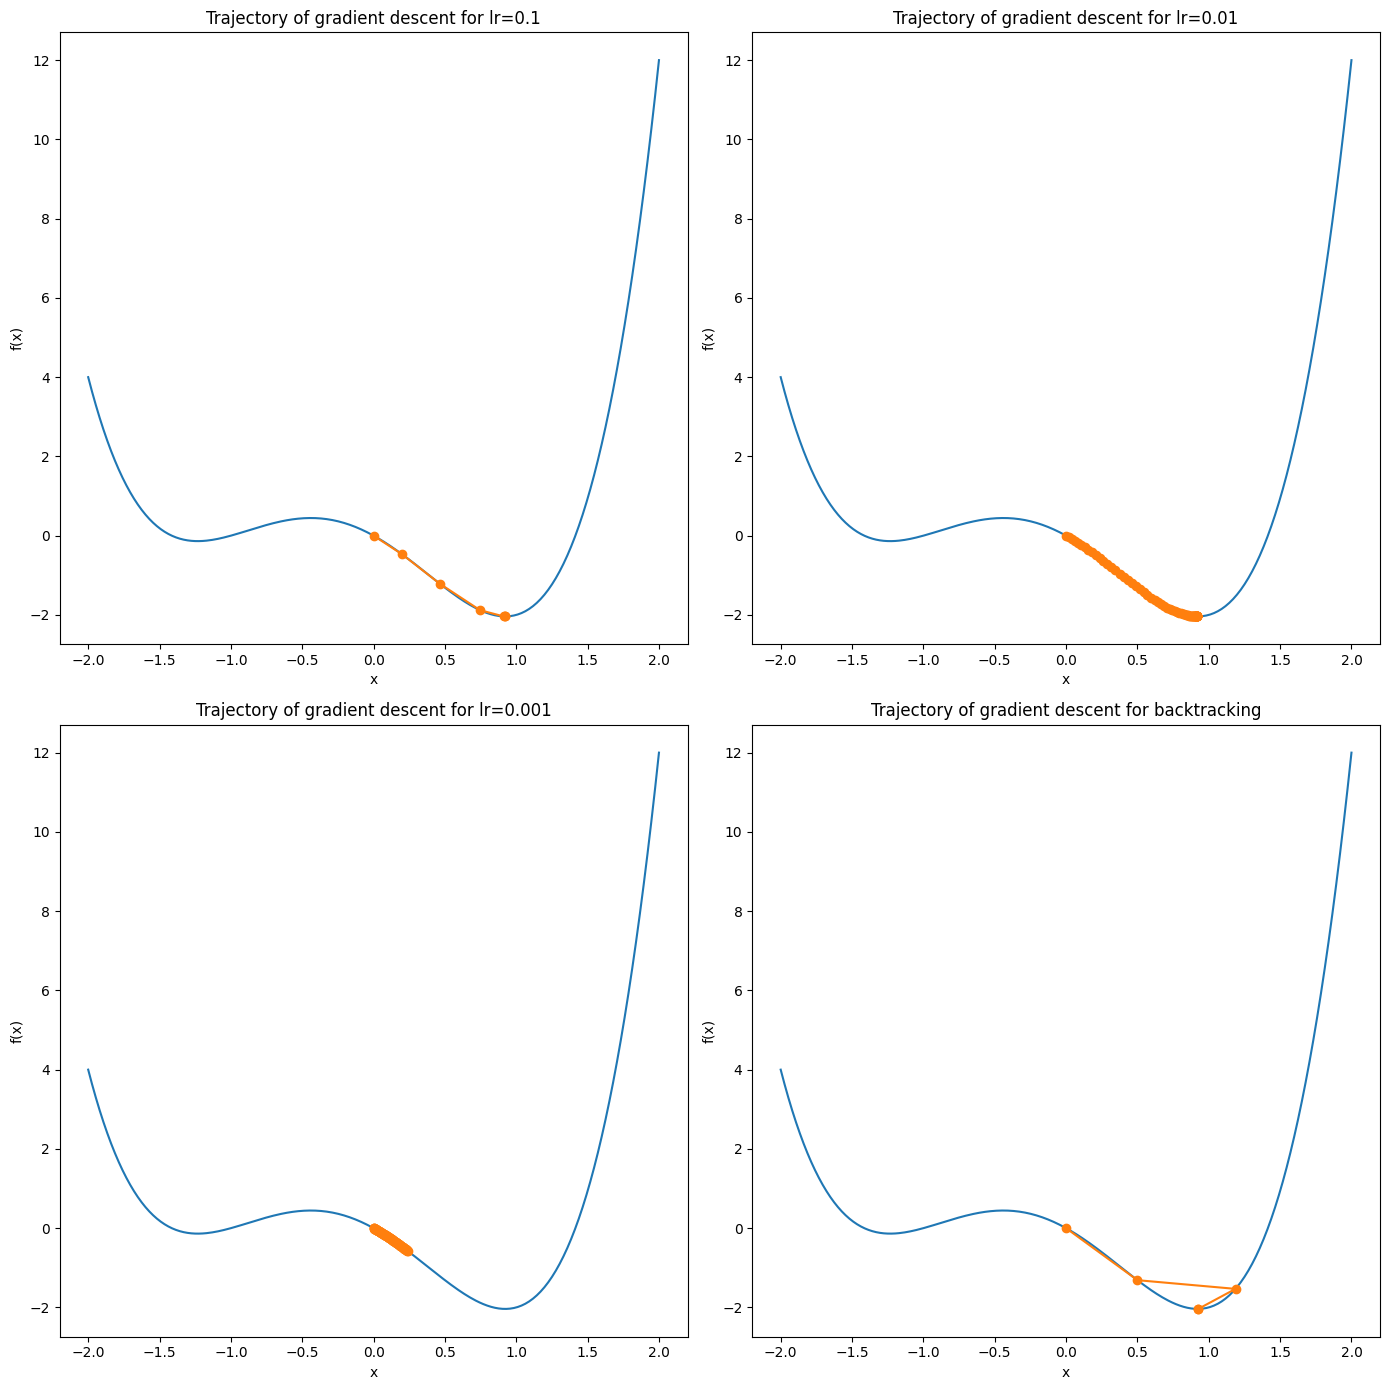

Best approach: lr=0.1
best_x: -1.2317822114504289
best_f: -0.13781065901694767
best_k: 12


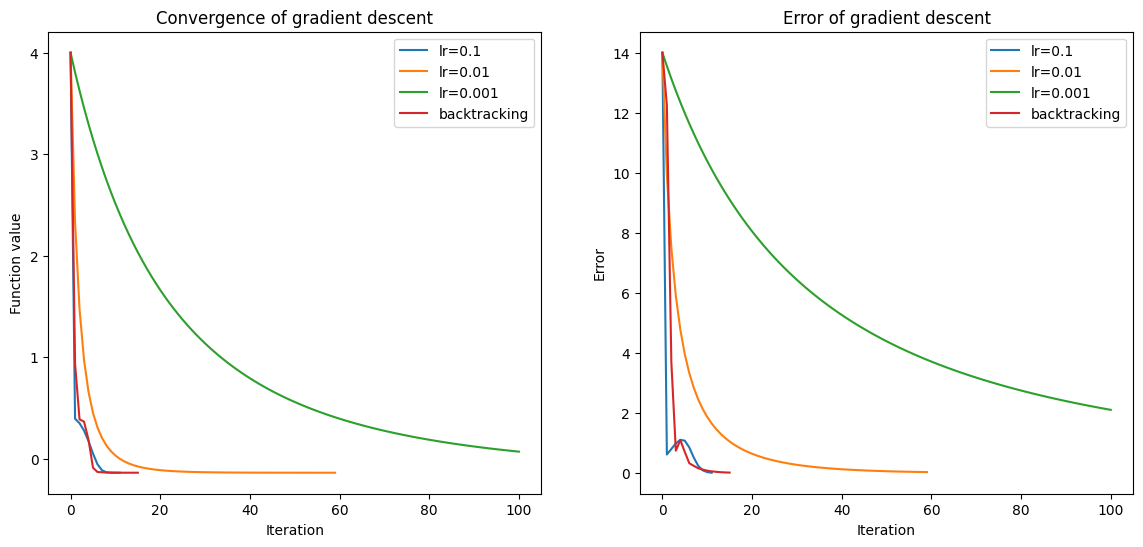

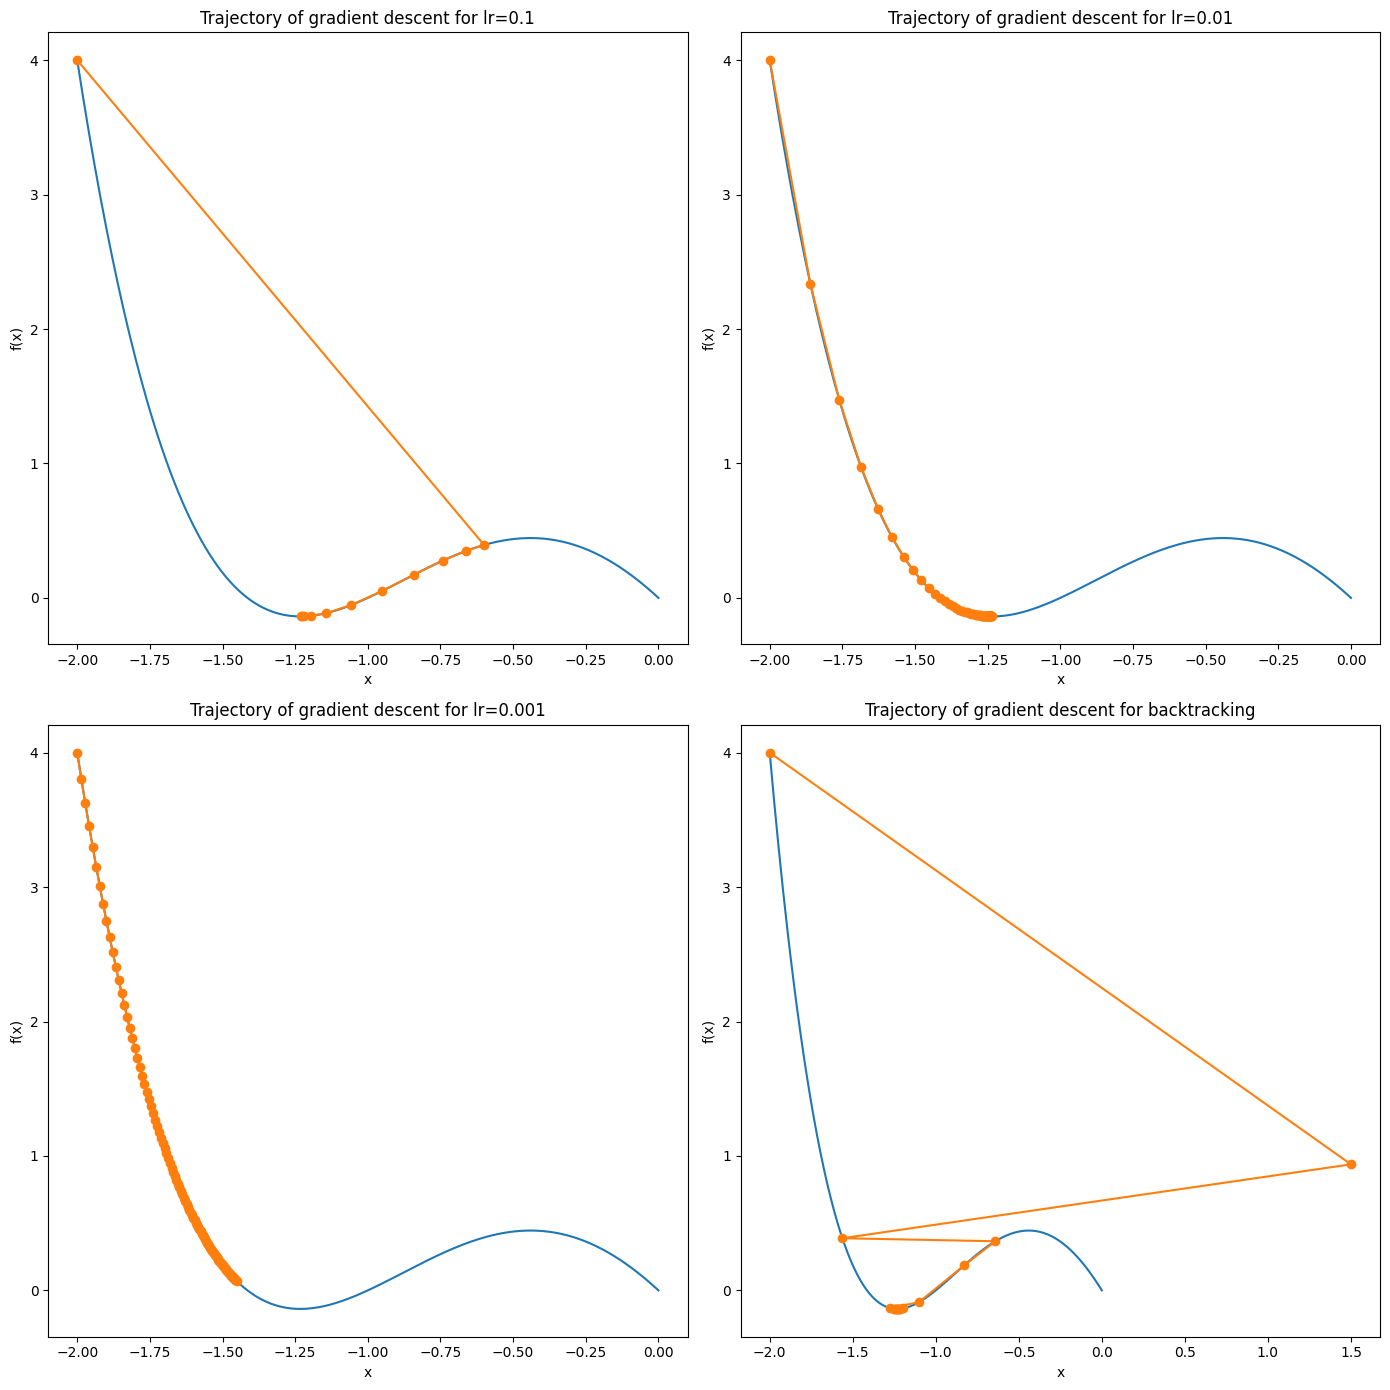

In [11]:
def f5_example(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5_example(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

x = np.linspace(-2.5, 2.5, 400)
y = f5_example(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.legend()
plt.grid(True)
plt.show()

x0 = 0
test_function(f5_example, grad_f5_example, x0, plot_trajectory=True)

x0 = -2
test_function(f5_example, grad_f5_example, x0, plot_trajectory=True)

> In this case, starting from x0 = 0, we find the global minimum. But with the same function, starting from x0 = -2 bring us in a local minimum.

## Optimization via Stochastic Gradient Descent
Consider a dataset $(X,Y)$, where:

$$
X = \begin{bmatrix} x^1 & x^2 & \dots & x^N \end{bmatrix} \in \mathbb{R}^{d \times N}, \qquad Y = \begin{bmatrix} y^1 & y^2 & \dots & y^N \end{bmatrix} \in \mathbb{R}^N,
$$

together with a model $f_\theta(x)$, with vector of parameters $\theta$. **Training** a ML model requires solving:

$$
\theta^* = \arg\min_{\theta} \ell(\theta; X, Y) = \arg\min_{\theta} \sum_{i=1}^N \ell_i(\theta; x^i, y^i). 
$$

Since the optimization problem above is written as a sum of independent terms that only depends on the single datapoints, it satisfies the hypothesis for the application of the Stochastic Gradient Descent (SGD) algorithm, which articulates as follows:

* Given an integer `batch_size`, *randomly* extract a sub-dataset $\mathcal{M}$ such that $|\mathcal{M}| = `batch_size`$ from the original dataset. Note that the random sampling at each iteration has to be done without replacement.
* Compute the gradient of the loss function on the sampled batch $\mathcal{M}$ as:

  $$
  \nabla \ell(\theta; \mathcal{M}) = \frac{1}{| \mathcal{M} |} \sum_{i \in \mathcal{M}} \nabla \ell (\theta; x^i, y^i),
  $$
* Compute one single iteration of the GD algorithm on the direction described by $\nabla \ell(\theta; \mathcal{M})$:

  $$
  \theta_{k+1} = \theta_k - \alpha_k \nabla \ell(\theta_k; \mathcal{M}),
  $$

* Repeat until the full dataset has been extracted. When this happens, we say that we completed an **epoch** of the SGD method. Repeat this procedure for a number of epochs equal to a parameter `n_epochs`, given as input.

Consider the dataset `poly_regression_large.csv`, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

* Split the dataset into training and test set as in the Homework 2, with a proportion of 80% training and 20% test. 
* Fix a degree $K$ for the polynomial. 
* Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.
* Train the polynomial regression model on the training set via the Gradient Descent algorithm.
* Train the polynomial regression model on the `poly_regression_small.csv` dataset. Use the full dataset for this test, without splitting it into training and test set.
* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models.

* Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.
* Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^* = [0, 0, 4, 0, -3]$.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [13]:

# Load the dataset
data_large = pd.read_csv('poly_regression_large.csv')
data_small = pd.read_csv('poly_regression_small.csv')

# Prepare the data
X_large = data_large[['x']].values
Y_large = data_large['y'].values
X_small = data_small[['x']].values
Y_small = data_small['y'].values

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_large, Y_large, test_size=0.2, random_state=42)


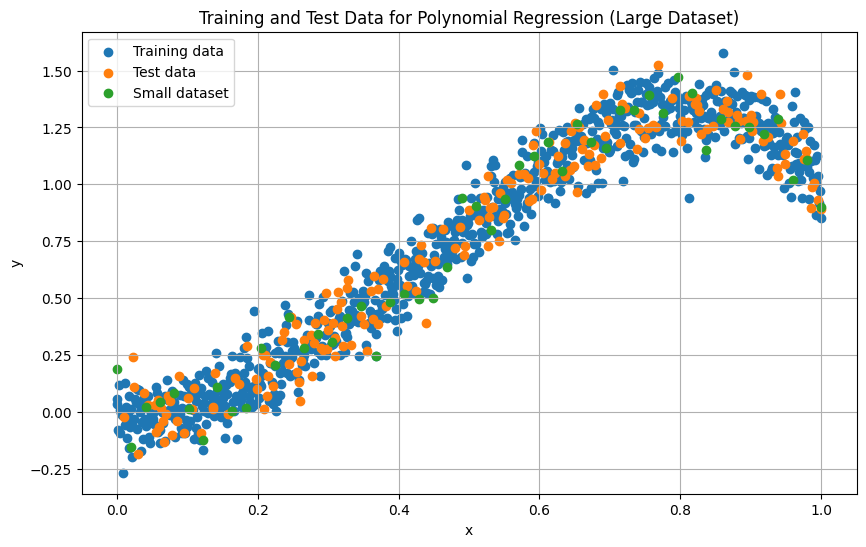

In [14]:
# Plot the training and test data for large dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Training data')
plt.scatter(X_test, Y_test, label='Test data')
plt.scatter(X_small, Y_small, label='Small dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Test Data for Polynomial Regression (Large Dataset)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
def stochastic_gradient_descent(X, Y, theta, f, grad_f, learning_rate=0.01, batch_size=1, n_epochs=1000):
    """
    Perform stochastic gradient descent optimization.
    
    Parameters:
    X (numpy.ndarray): The input data matrix.
    Y (numpy.ndarray): The output data vector.
    theta (numpy.ndarray): The initial parameters.
    f (function): The loss function to minimize.
    grad_f (function): The gradient of the loss function.
    learning_rate (float): The learning rate for the gradient descent.
    batch_size (int): The size of the batch for each iteration.
    n_epochs (int): The number of epochs to run the SGD.
    
    Returns:
    tuple: A tuple containing the optimized parameters and a history dictionary.
        - theta (numpy.ndarray): The optimized parameters.
        - history (dict): A dictionary containing the history of theta, f, and grad_f values.
            - 'theta' (list): The history of parameter values.
            - 'f' (list): The history of function values.
            - 'grad_f' (list): The history of gradient values.
            - 'err' (list): The history of errors (norm of the gradients).
    """
    m = len(Y)
    history = {'theta': [theta], 'f': [f(X, Y, theta)], 'grad_f': [grad_f(X, Y, theta)]}
    
    for _ in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]
            
            gradient = grad_f(X_batch, Y_batch, theta)
            theta = theta - learning_rate * gradient
            
        # Update history at the end of each epoch
        history['theta'].append(theta)
        history['f'].append(f(X, Y, theta))
        history['grad_f'].append(gradient)
            
    return theta, history

In [16]:
# Define the polynomial regression model
def create_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

In [17]:
# Define the loss function (This is Mean Squared Error)
def polynomial_loss(X, Y, theta):
    predictions = np.dot(X, theta)
    return np.mean((predictions - Y) ** 2)

# Define the gradient of the loss function
def polynomial_gradient(X, Y, theta):
    predictions = np.dot(X, theta)
    return np.dot(X.T, (predictions - Y)) / len(Y)

In [18]:
def plot_errors(histories):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for history in histories:
        errors = [np.linalg.norm(grad) for grad in history['grad_f']]
        ax.plot(errors, label='Batch size = {}'.format(history['theta'][0].shape[0]))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Error')
    ax.set_title('Error of Stochastic Gradient Descent')
    ax.legend()
    plt.show()

In [19]:
def plot_polynomial_regression(X, Y, thetas):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, label='Training data', color='lightgray')  # Plot the polynomial regression curves
    x_values = np.linspace(0, 1, 100)
    
    for theta in thetas:
        X_values_poly = create_polynomial_features(x_values.reshape(-1, 1), len(theta) - 1)
        y_values = np.dot(X_values_poly, theta)
        plt.plot(x_values, y_values, label=f"SGD (k = {len(theta) - 1})")
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Test on Stochastic Gradient Descent

In [20]:
# Create polynomial features for the training, test, and small datasets
theta_opts, histories = [], []
for K in range(2, 6):
    print(f"Polynomial degree: {K}")
    theta = np.random.randn(K + 1)
    X_train_poly = create_polynomial_features(X_train, K)
    # Run stochastic gradient descent
    theta_opt, history = stochastic_gradient_descent(
        X_train_poly, Y_train, theta, polynomial_loss, polynomial_gradient, learning_rate=0.01, batch_size=1, n_epochs=1000
    )
    print(f"\ttheta_opt: {theta_opt}")
    print(f"\tfinal_loss: {history['f'][-1]}\n")
    
    theta_opts.append(theta_opt)
    histories.append(history)

Polynomial degree: 2
	theta_opt: [-0.28640675  2.78707858 -1.18761089]
	final_loss: 0.021480838017156945

Polynomial degree: 3
	theta_opt: [-0.10079784  0.84376413  3.88909751 -3.44148352]
	final_loss: 0.011965153625523106

Polynomial degree: 4
	theta_opt: [-0.05348432  0.53315379  2.5779652   1.40722292 -3.45066096]
	final_loss: 0.00927850638981118

Polynomial degree: 5
	theta_opt: [-0.07960223  0.87138866  1.57998803  1.08809774 -0.44872765 -2.06295953]
	final_loss: 0.009517965753725623



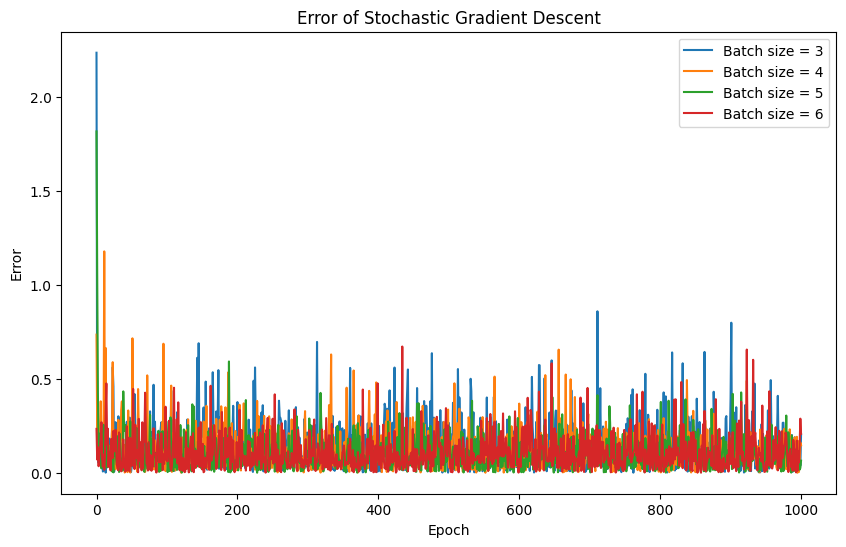

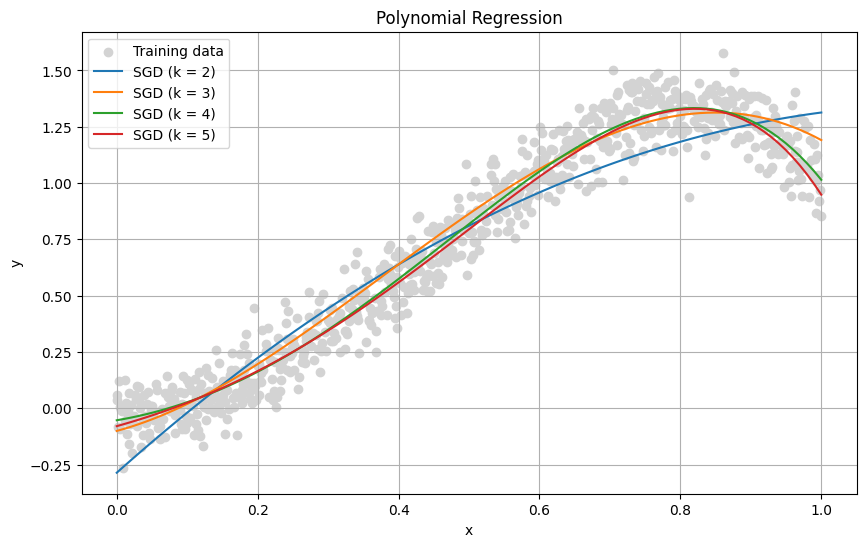

Best approach: Polynomial degree = 4
best_theta: [-0.05348432  0.53315379  2.5779652   1.40722292 -3.45066096]


In [21]:
plot_errors(histories)
plot_polynomial_regression(X_train, Y_train, theta_opts)

best = np.argmin([history['f'][-1] for history in histories])
print(f'Best approach: Polynomial degree = {best + 2}')
best_theta_sgd = theta_opts[best]
print(f'best_theta: {best_theta_sgd}')

In [22]:
# Create polynomial features for the training, test, and small datasets
theta_opts_2, histories_2 = [], []
for K in range(2, 6):
    print(f"Polynomial degree: {K}")
    X_small_poly = create_polynomial_features(X_small, K)
    theta = np.random.randn(K + 1)
    # Run stochastic gradient descent
    theta_opt, history = stochastic_gradient_descent(
        X_small_poly, Y_small, theta, polynomial_loss, polynomial_gradient, learning_rate=0.01, batch_size=1, n_epochs=1000
    )
    print(f"\ttheta_opt: {theta_opt}")
    print(f"\tfinal_loss: {history['f'][-1]}\n")
    
    theta_opts_2.append(theta_opt)
    histories_2.append(history)

Polynomial degree: 2
	theta_opt: [-0.16251382  2.21740021 -0.67509776]
	final_loss: 0.0319540978930983

Polynomial degree: 3
	theta_opt: [-0.2170286   2.06429589  0.83375071 -1.47093694]
	final_loss: 0.02280762793385828

Polynomial degree: 4
	theta_opt: [-0.17935906  1.60220654  1.38598937 -0.30396972 -1.40687936]
	final_loss: 0.016509807993304124

Polynomial degree: 5
	theta_opt: [-0.17967523  1.64247072  0.99368173  0.42200302 -1.32990671 -0.4918327 ]
	final_loss: 0.015157091769250574



> True params should be: [0, 0, 4, 0, -3], but we have a little difference in the results given probably by a low number of epochs and an unlucky random seed.

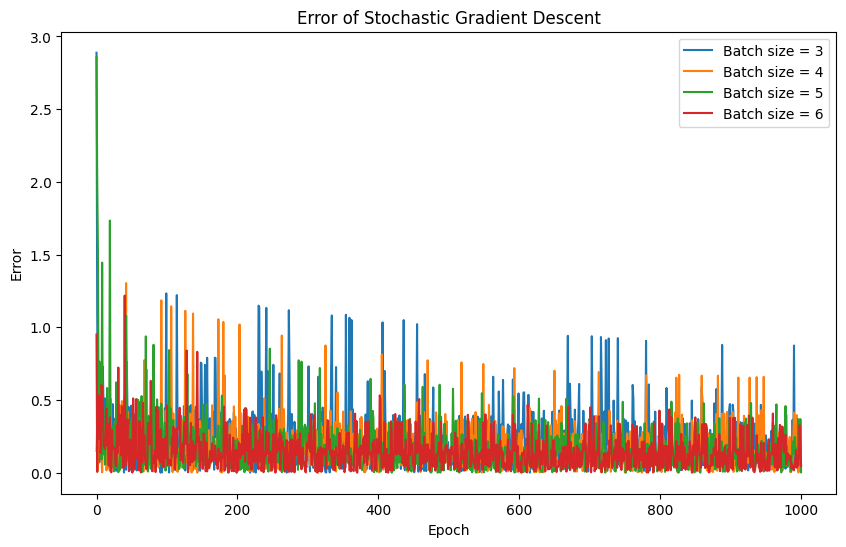

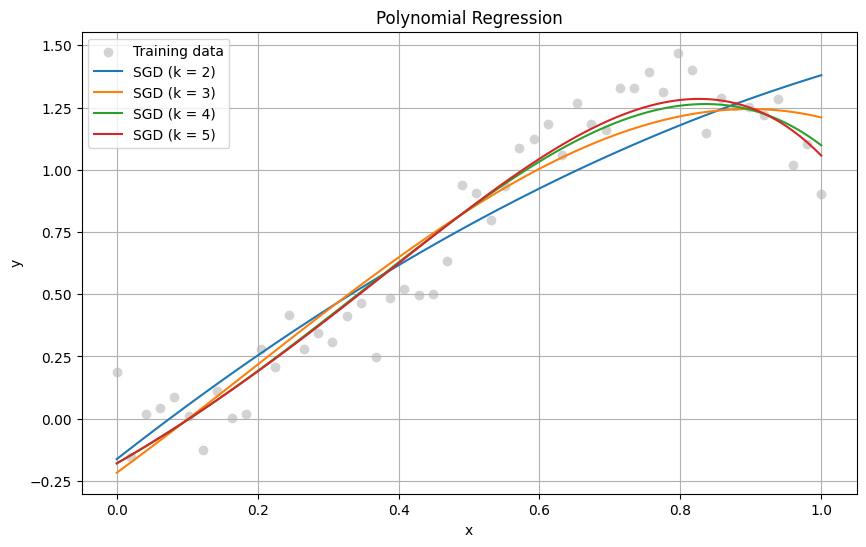

Best approach: Polynomial degree = 5
best_theta: [-0.17967523  1.64247072  0.99368173  0.42200302 -1.32990671 -0.4918327 ]


In [23]:
plot_errors(histories_2)
plot_polynomial_regression(X_small, Y_small, theta_opts_2)

best = np.argmin([history['f'][-1] for history in histories_2])
print(f'Best approach: Polynomial degree = {best + 2}')
best_theta_sgd_small = theta_opts_2[best]
print(f'best_theta: {best_theta_sgd_small}')

#### Test on Gradient Descent

In [24]:
# Fit a linear regression model using SGDRegressor
def make_poly_loss(X, Y):
    def poly_loss(theta):
        predictions = np.dot(X, theta)
        return np.mean((predictions - Y) ** 2)
    return poly_loss
 
def make_poly_gradient(X, Y):
    def poly_gradient(theta):
        predictions = np.dot(X, theta)
        return np.dot(X.T, (predictions - Y)) / len(Y)
    return poly_gradient

In [25]:
# Create polynomial features for the training, test, and small datasets
theta_opts_3, histories_3 = [], []
for K in range(2, 6):
    print(f"Polynomial degree: {K}")
    theta = np.random.randn(K + 1)
    X_train_poly = create_polynomial_features(X_train, K)
    
    poly_f = make_poly_loss(X_train_poly, Y_train)
    poly_grad = make_poly_gradient(X_train_poly, Y_train)   
    # Run stochastic gradient descent
    theta_opt, history = gradient_descent(
        poly_f, poly_grad, theta, alpha=0.01, kmax=1000, tolx=1e-5, tolf=1e-5
    )
    print(f"\ttheta_opt: {theta_opt}")
    print(f"\tfinal_loss: {history['f'][-1]}\n")
    
    theta_opts_3.append(theta_opt)
    histories_3.append(history)

Polynomial degree: 2
	theta_opt: [-0.04462383  2.02604642 -0.66808616]
	final_loss: 0.028251203248362455

Polynomial degree: 3
	theta_opt: [1.59713419e-01 3.64356676e-01 1.13229190e+00 7.29898858e-04]
	final_loss: 0.05247328024761913

Polynomial degree: 4
	theta_opt: [-0.05238101  1.69244036 -0.44784991 -0.21729435  0.67676808]
	final_loss: 0.03990970463578529

Polynomial degree: 5
	theta_opt: [ 0.32492903  0.52422207  0.05478188  0.05112991  1.28939277 -0.71558563]
	final_loss: 0.07165306482532408



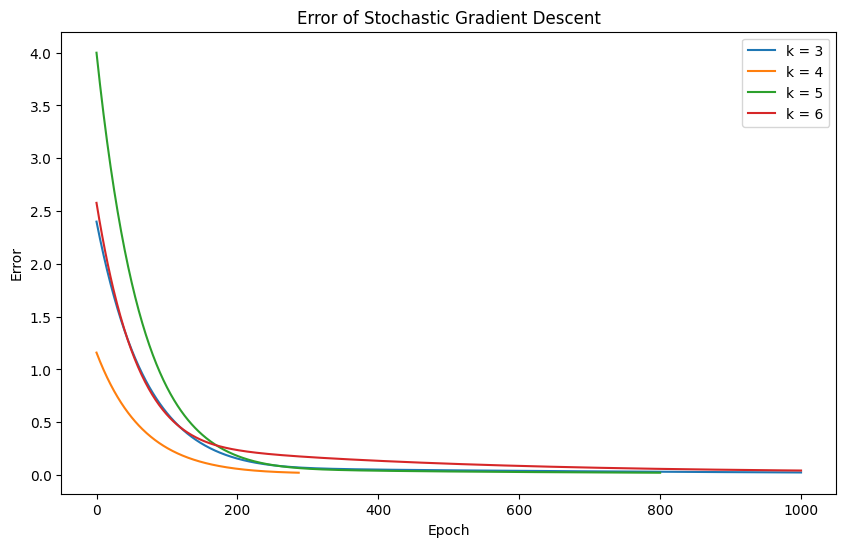

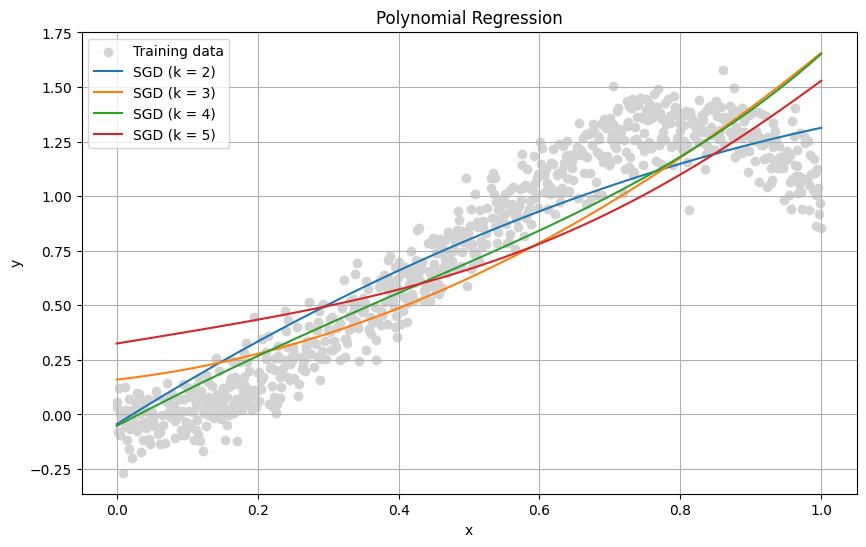

Best approach: Polynomial degree = 2
best_theta: [-0.28640675  2.78707858 -1.18761089]


In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for history in histories_3:
    errors = [np.linalg.norm(grad) for grad in history['grad_f']]
    ax.plot(errors, label='k = {}'.format(history['x'][0].shape[0]))
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.set_title('Error of Stochastic Gradient Descent')
ax.legend()
plt.show()
plot_polynomial_regression(X_train, Y_train, theta_opts_3)

best = np.argmin([history['f'][-1] for history in histories_3])
print(f'Best approach: Polynomial degree = {best + 2}')
best_theta_gd = theta_opts[best]
print(f'best_theta: {best_theta_gd}')


Error using Gradient Descent: 0.022807160608756084
Error using Stochastic Gradient Descent: 0.009140028710906462
Error using Small Dataset: 0.01148383496328095


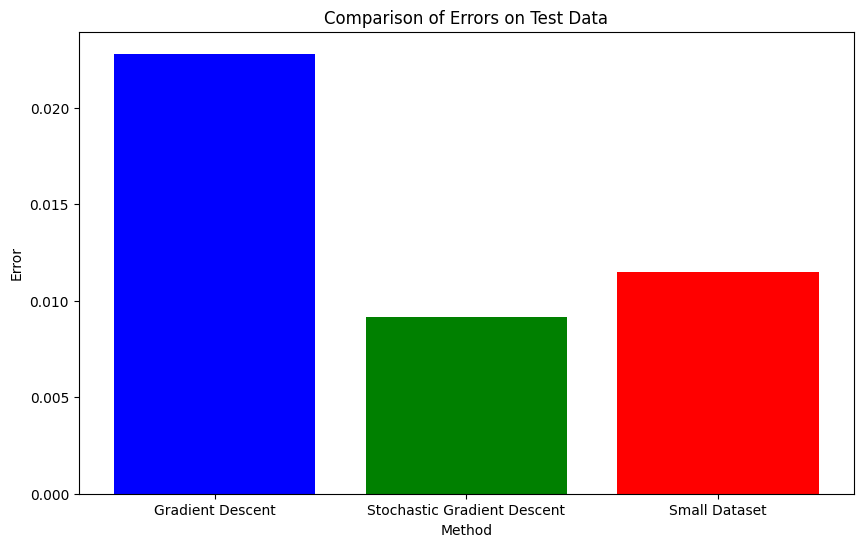

In [27]:
# Calculate the errors
error_gd = polynomial_loss(create_polynomial_features(X_test, len(best_theta_gd) - 1), Y_test, best_theta_gd)
error_sgd = polynomial_loss(create_polynomial_features(X_test, len(best_theta_sgd) - 1), Y_test, best_theta_sgd)
error_small = polynomial_loss(create_polynomial_features(X_test, len(best_theta_sgd_small) - 1), Y_test, best_theta_sgd_small)

# Print the errors
print(f"Error using Gradient Descent: {error_gd}")
print(f"Error using Stochastic Gradient Descent: {error_sgd}")
print(f"Error using Small Dataset: {error_small}")

# Plot the errors
errors = [error_gd, error_sgd, error_small]
labels = ['Gradient Descent', 'Stochastic Gradient Descent', 'Small Dataset']

plt.figure(figsize=(10, 6))
plt.bar(labels, errors, color=['blue', 'green', 'red'])
plt.xlabel('Method')
plt.ylabel('Error')
plt.title('Comparison of Errors on Test Data')
plt.show()